In [1]:
import numpy as np
import pandas as pd

import matplotlib

def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    From: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

width, height = set_size(252, fraction=1.0)

font=9

matplotlib.rcParams.update({
    'font.size': font,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 300, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': font,
    'ytick.labelsize': font,
    'legend.fontsize': font,
})

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
@ticker.FuncFormatter
def worker_formatter(x, pos):
    x = str(int(x))
    return x

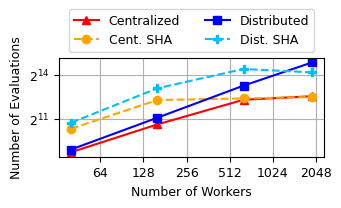

In [4]:
y = {
    "ACBO": [444, 1624, 5137, 6055],
    "ACBO+SHA": [1325, 5068, 5460, 5832],
    "ADBO": [503, 2217, 9930, 29222],
    "ADBO+SHA": [1760, 8748, 21570, 18431],
}

x = [(10*4)*(4**i) for i in range(3)] + [1920]

plt.figure()


plt.plot(x, y["ACBO"], marker="^", color="red", label="Centralized")
plt.plot(x, y["ACBO+SHA"], marker="o", color="orange", linestyle="--", label="Cent. SHA")
plt.plot(x, y["ADBO"], marker="s", color="blue", label="Distributed")
plt.plot(x, y["ADBO+SHA"], marker="P", color="deepskyblue", linestyle="--", label="Dist. SHA")


plt.xscale("log", base=2)
plt.yscale("log", base=2)
plt.ylabel("Number of Evaluations")
plt.xlabel("Number of Workers")
ax = plt.gca()
ax.xaxis.set_major_formatter(worker_formatter)
plt.grid()
plt.legend(ncol=2, loc="lower center", bbox_to_anchor=(0.5, 1.0))
plt.tight_layout()
plt.savefig("scaling-num-evaluations.png")
plt.show()

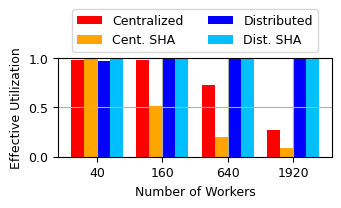

In [6]:
# y = {
#     "ACBO": [0.887, 0.903, 0.693],# 0.254],
#     "ACBO+SHA": [0.931, 0.494, 0.192],# 0],
#     "ADBO": [0.915, 0.931, 0.924],# 0.902],
#     "ADBO+SHA": [0.971, 0.969, 0.952],# 0],
# }
# After correction
y = {
    "ACBO": [0.978, 0.983, 0.728, 0.267],
    "ACBO+SHA": [0.993, 0.514, 0.198, 0.092],
    "ADBO": [0.972, 0.99, 0.992, 0.99],
    "ADBO+SHA": [0.995, 0.99, 0.989, 0.994],
}

x = [(10*4)*(4**i) for i in range(3)] + [1920]

ind = np.arange(len(x)) 
width = 0.20
  
bar1 = plt.bar(ind-width/2-width, y["ACBO"], width, color="red")
bar2 = plt.bar(ind-width/2, y["ACBO+SHA"], width, color="orange")
bar3 = plt.bar(ind+width/2, y["ADBO"], width, color="blue")
bar4 = plt.bar(ind+width/2+width, y["ADBO+SHA"], width, color="deepskyblue")
  
plt.xlabel("Number of Workers")
plt.ylabel("Effective Utilization")
  
plt.xticks(ind, x)
plt.legend(
    (bar1,bar2,bar3,bar4), 
    ("Centralized", "Cent. SHA", "Distributed", "Dist. SHA"), 
    loc="lower center", 
    ncols=2,
    bbox_to_anchor=(0.5, 1.0)
)
plt.ylim(0,1)
plt.grid()
plt.tight_layout()
plt.savefig("scaling-utilization.png")
plt.show()

In [ ]:
# Duration
y_mean = {
    "ACBO": [576, 798, 622, 581],
    "ACBO+SHA": [],
    "ADBO": [],
    "ADBO+SHA": [],
}
y_std = {
    "ACBO": [542],
    "ACBO+SHA": [],
    "ADBO": [],
    "ADBO+SHA": [],
}

In [7]:
np.mean([576, 798, 622, 581])/60

10.7375

In [25]:
from deephyper.problem import HpProblem

hp_problem = HpProblem()

# Model hyperparameters
ACTIVATIONS = [
    "elu",
    "gelu",
    "hard_sigmoid",
    "linear",
    "relu",
    "selu",
    "sigmoid",
    "softplus",
    "softsign",
    "swish",
    "tanh",
]
default_dense = [1000, 1000, 1000]
default_dense_feature_layers = [1000, 1000, 1000]

for i in range(len(default_dense)):

    hp_problem.add_hyperparameter(
        (10, 1024, "log-uniform"),
        f"dense_{i}",
        default_value=default_dense[i],
    )

    hp_problem.add_hyperparameter(
        (10, 1024, "log-uniform"),
        f"dense_feature_layers_{i}",
        default_value=default_dense_feature_layers[i],
    )

hp_problem.add_hyperparameter(ACTIVATIONS, "activation", default_value="relu")

# Optimization hyperparameters
hp_problem.add_hyperparameter(
    [
        "sgd",
        "rmsprop",
        "adagrad",
        "adadelta",
        "adam",
    ],
    "optimizer",
    default_value="sgd",
)

hp_problem.add_hyperparameter((0, 0.5), "dropout", default_value=0.0)
hp_problem.add_hyperparameter((8, 512, "log-uniform"), "batch_size", default_value=32)

hp_problem.add_hyperparameter(
    (1e-5, 1e-2, "log-uniform"), "learning_rate", default_value=0.001
)
hp_problem.add_hyperparameter(
    (1e-5, 1e-2, "log-uniform"), "base_lr", default_value=0.001
)
hp_problem.add_hyperparameter([True, False], "residual", default_value=False)

hp_problem.add_hyperparameter([True, False], "early_stopping", default_value=False)
hp_problem.add_hyperparameter((5, 20), "early_stopping_patience", default_value=5)

hp_problem.add_hyperparameter([True, False], "reduce_lr", default_value=False)
hp_problem.add_hyperparameter((0.1, 1.0), "reduce_lr_factor", default_value=0.5)
hp_problem.add_hyperparameter((5, 20), "reduce_lr_patience", default_value=5)

hp_problem.add_hyperparameter([True, False], "warmup_lr", default_value=False)
hp_problem.add_hyperparameter([True, False], "batch_normalization", default_value=False)

hp_problem.add_hyperparameter(
    ["mse", "mae", "logcosh", "mape", "msle", "huber"], "loss", default_value="mse"
)

hp_problem.add_hyperparameter(
    ["std", "minmax", "maxabs"], "scaling", default_value="std"
)

scaling, Type: Categorical, Choices: {std, minmax, maxabs}, Default: std

In [26]:
hp_problem

Configuration space object:
  Hyperparameters:
    activation, Type: Categorical, Choices: {elu, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softplus, softsign, swish, tanh}, Default: relu
    base_lr, Type: UniformFloat, Range: [1e-05, 0.01], Default: 0.001, on log-scale
    batch_normalization, Type: Categorical, Choices: {True, False}, Default: False
    batch_size, Type: UniformInteger, Range: [8, 512], Default: 32, on log-scale
    dense_0, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_1, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_2, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_0, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_1, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dense_feature_layers_2, Type: UniformInteger, Range: [10, 1024], Default: 1000, on log-scale
    dropout, Type: Un

In [28]:
len(hp_problem.hyperparameter_names)

22

In [32]:
np.mean(y)

0.9178000000000001